K194141740 - TRẦN THANH PHÚC

First, I will import the libraries that I think I will use in this task.

In [61]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Import the Data

In [62]:
# Import Data
df = pd.read_csv('company.csv', encoding='unicode_escape' )

DATA UNDERSTANDING

OK. Let's proceed to the Data Understanding section.

In [63]:
print(df.shape)
print(list(df.columns))

(495478, 7)
['CustomerID', 'InvoiceNo', 'InvoiceDate', 'StockCode', 'Description', 'Quantity', 'UnitPrice']


It is easy to see that the data has 7 variables and 495478 observations. 

Next, I will look at the top 5 and bottom observations of the data.  It is useful for quickly verifying data. For example, after sorting or appending rows.

In [64]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice
0,17850.0,536365,25/09/2020,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,8.415
1,17850.0,536365,25/09/2020,71053,WHITE METAL LANTERN,6,11.187
2,17850.0,536365,25/09/2020,84406B,CREAM CUPID HEARTS COAT HANGER,8,9.075
3,17850.0,536365,25/09/2020,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11.187
4,17850.0,536365,25/09/2020,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11.187


In [65]:
df.tail()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice
495473,15804.0,581585,03/10/2021,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,6.435
495474,13113.0,581586,04/10/2021,22061,LARGE CAKE STAND HANGING STRAWBERY,8,9.735
495475,13113.0,581586,04/10/2021,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,4.125
495476,13113.0,581586,04/10/2021,21217,RED RETROSPOT ROUND CAKE TINS,24,29.535
495477,13113.0,581586,04/10/2021,20685,DOORMAT RED RETROSPOT,10,23.364


Let’s prints information about our dataset including the index dtype and columns, non-null values and memory usage.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495478 entries, 0 to 495477
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   361878 non-null  float64
 1   InvoiceNo    495478 non-null  object 
 2   InvoiceDate  495478 non-null  object 
 3   StockCode    495478 non-null  object 
 4   Description  494024 non-null  object 
 5   Quantity     495478 non-null  int64  
 6   UnitPrice    495478 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 26.5+ MB


We see that there are 3 numerical variables and 4 categorical variables. I added them to 2 separate variables because they can be useful later.

In [67]:
numerical_features = ['CustomerID', 'Quantity', 'UnitPrice']
categorical_features = [x for x in df.columns if (x not in numerical_features)]

Let's generate descriptive statistics, which summarize the central tendency, dispersion, and shape of a dataset's distribution while excluding null values.

In [68]:
# Describe Data
df.describe()

,CustomerID,Quantity,UnitPrice
count,361878.000000,495478.000000,495478.000000
mean,15547.871368,8.605486,14.956993
std,1594.402590,227.588756,327.740946
min,12346.000000,-80995.000000,-36504.798000
25%,14194.000000,1.000000,4.125000
50%,15514.000000,3.000000,6.930000
75%,16931.000000,10.000000,13.629000
max,18287.000000,80995.000000,128601.000000


Let's visualize 3 numerical variables with graphs to make it easier to understand.

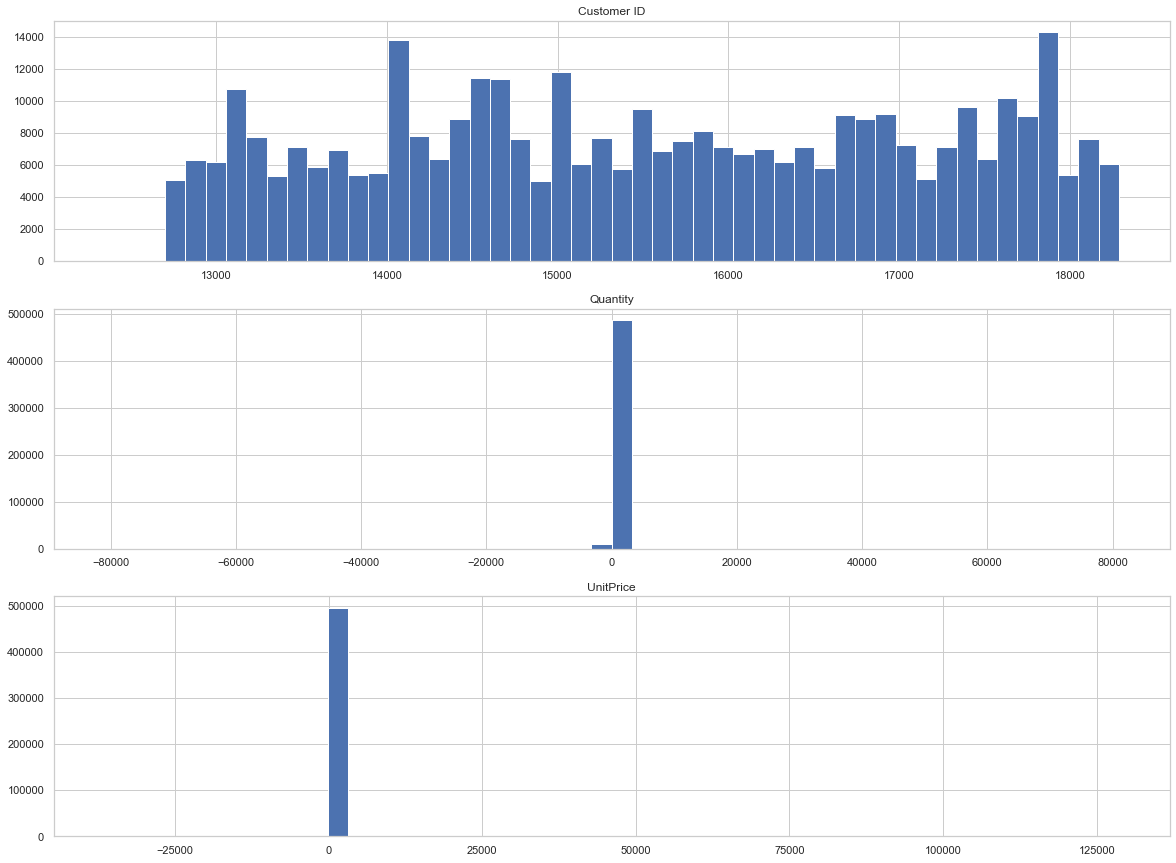

In [69]:
plt.figure(figsize=(20,15))
ax1 = plt.subplot(3,1,1)
ax1 = df['CustomerID'].hist(bins=50)
ax1.set_title('Customer ID')

ax2 = plt.subplot(3,1,2)
ax2 = df['Quantity'].hist(bins=50)
ax2.set_title('Quantity')

ax3 = plt.subplot(3,1,3)
ax3 = df['UnitPrice'].hist(bins=50)
ax3.set_title('UnitPrice')

# plt.savefig(“attribute_histogram_plots”)
plt.show()

There are some negative values in the "Quantity" and "UnitPrice" features, as seen in both the statistical summary and the histogram above. Because it makes no sense for quantity to be negative, I will remove these values in the next phase.

Let’s check the number of missing values in each column.

In [70]:
# Check minssing values
df.isna().sum()

CustomerID     133600
InvoiceNo           0
InvoiceDate         0
StockCode           0
Description      1454
Quantity            0
UnitPrice           0
dtype: int64

These missing values cannot be filled using methods because they will be wrong in nature and meaning. Thereore, I will remove them in later section.


Let’s compute pairwise correlation of columns, excluding null values.

            CustomerID  Quantity  UnitPrice
CustomerID    1.000000 -0.000844  -0.000828
Quantity     -0.000844  1.000000  -0.000994
UnitPrice    -0.000828 -0.000994   1.000000


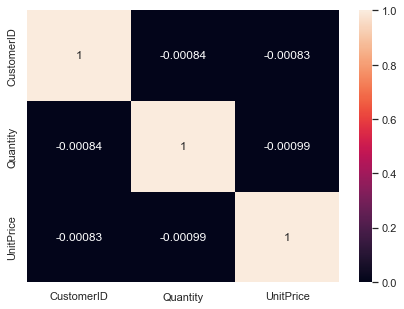

In [71]:
print(df.corr())  # view correlation
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

It is easy to see that the variables are not correlated at all.

DATA PREPROCESSING

Let's make a copy dataset for this section.

In [72]:
df2 = df.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495478 entries, 0 to 495477
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   361878 non-null  float64
 1   InvoiceNo    495478 non-null  object 
 2   InvoiceDate  495478 non-null  object 
 3   StockCode    495478 non-null  object 
 4   Description  494024 non-null  object 
 5   Quantity     495478 non-null  int64  
 6   UnitPrice    495478 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 26.5+ MB


I will remove missing values for the new dataset as I said before.

In [73]:
# Drop missing values and check
df2 = df2.dropna()
print(df2.isna().sum())
df2.info()

CustomerID     0
InvoiceNo      0
InvoiceDate    0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 495477
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   361878 non-null  float64
 1   InvoiceNo    361878 non-null  object 
 2   InvoiceDate  361878 non-null  object 
 3   StockCode    361878 non-null  object 
 4   Description  361878 non-null  object 
 5   Quantity     361878 non-null  int64  
 6   UnitPrice    361878 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 22.1+ MB


Our database has shrunk by nearly 27%, from 495,478 to 361,878 records. It makes no difference because we still have a few hundred thousand records.

Next, let's remove any negative values and zero value in Quantity and UnitPrice columns. 

In [75]:
# Replace negative values with NaN
df2['Quantity'][df2['Quantity'] <= 0] = np.nan
df2['UnitPrice'][df2['UnitPrice'] <= 0] = np.nan
# Drop NaN
df2 = df2.dropna()
df2.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice
0,17850.0,536365,25/09/2020,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,8.415
1,17850.0,536365,25/09/2020,71053,WHITE METAL LANTERN,6.0,11.187
2,17850.0,536365,25/09/2020,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,9.075
3,17850.0,536365,25/09/2020,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,11.187
4,17850.0,536365,25/09/2020,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,11.187


Print out the summary information and statistics to check if the goal has been achieved.

In [76]:
print(df2.info())
print(df2.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 495477
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   354321 non-null  float64
 1   InvoiceNo    354321 non-null  object 
 2   InvoiceDate  354321 non-null  object 
 3   StockCode    354321 non-null  object 
 4   Description  354321 non-null  object 
 5   Quantity     354321 non-null  float64
 6   UnitPrice    354321 non-null  float64
dtypes: float64(3), object(4)
memory usage: 21.6+ MB
None
          CustomerID       Quantity      UnitPrice
count  354321.000000  354321.000000  354321.000000
mean    15552.486392      12.013795       9.781179
std      1594.527150     189.267956      58.946762
min     12346.000000       1.000000       0.003300
25%     14194.000000       2.000000       4.125000
50%     15522.000000       4.000000       6.435000
75%     16931.000000      12.000000      12.375000
max     18287.000000   80995.000000  

After removing nulls, our new dataset has 354,321 records and 7 columns.

DATA PREPARATION

Several features, such as "StockCode" and "Description," are unnecessary. As a result, I'm going to drop them.

In [77]:
# Delete 2 columns
del df2['StockCode']
del df2['Description']
df2.head()

,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice
0,17850.0,536365,25/09/2020,6.0,8.415
1,17850.0,536365,25/09/2020,6.0,11.187
2,17850.0,536365,25/09/2020,8.0,9.075
3,17850.0,536365,25/09/2020,6.0,11.187
4,17850.0,536365,25/09/2020,6.0,11.187


I want to give new names to the columns of the data to make it easier to use.

In [78]:
# Rename columns
df2 = df2.rename(columns={'CustomerID': 'ID_OF_CUSTOMER', 'InvoiceNo': 'NUMBER_OF_INVOICE', 'InvoiceDate': 'DATE_OF_INVOICE', \
    'Quantity': 'QUANTITY', 'UnitPrice': 'PRICE_OF_UNIT'})
df2.head()

,ID_OF_CUSTOMER,NUMBER_OF_INVOICE,DATE_OF_INVOICE,QUANTITY,PRICE_OF_UNIT
0,17850.0,536365,25/09/2020,6.0,8.415
1,17850.0,536365,25/09/2020,6.0,11.187
2,17850.0,536365,25/09/2020,8.0,9.075
3,17850.0,536365,25/09/2020,6.0,11.187
4,17850.0,536365,25/09/2020,6.0,11.187


Let's create visualizations for features

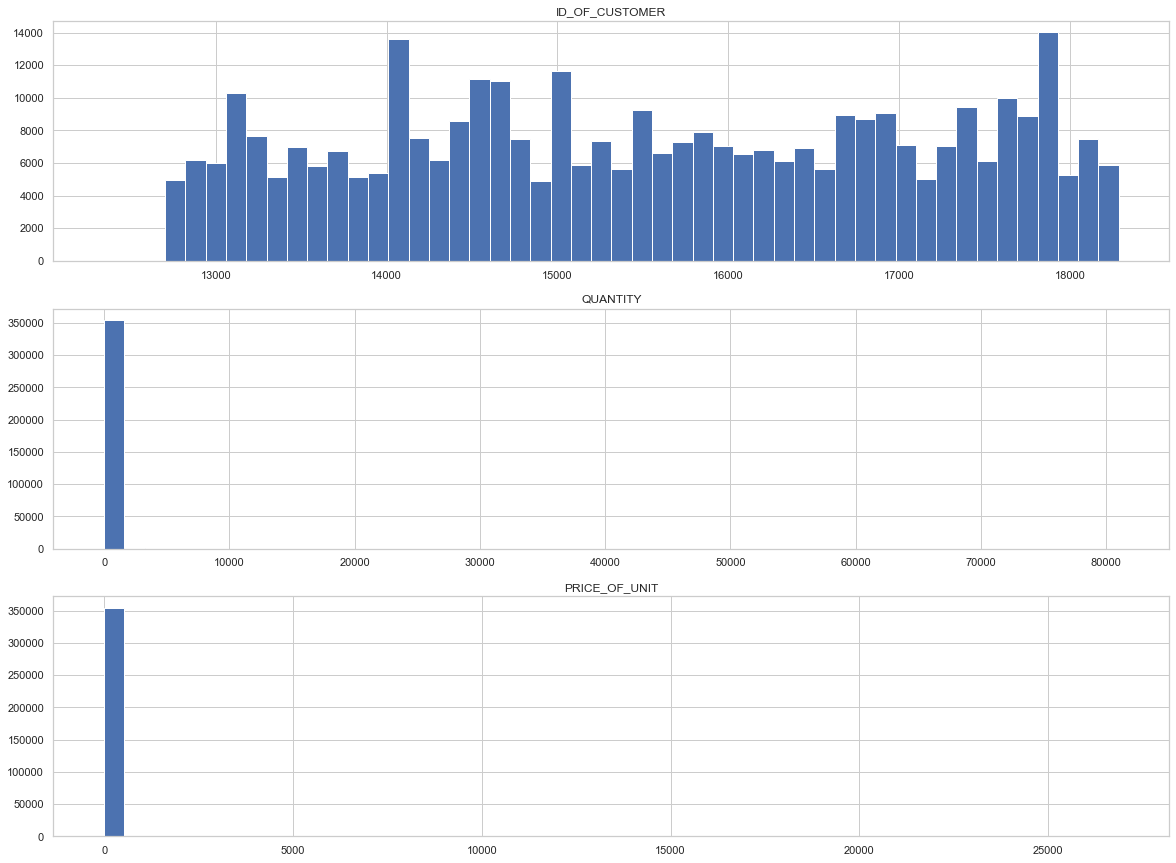

In [79]:
plt.figure(figsize=(20,15))
ax1 = plt.subplot(3,1,1)
ax1 = df2['ID_OF_CUSTOMER'].hist(bins=50)
ax1.set_title('ID_OF_CUSTOMER')

ax2 = plt.subplot(3,1,2)
ax2 = df2['QUANTITY'].hist(bins=50)
ax2.set_title('QUANTITY')

ax3 = plt.subplot(3,1,3)
ax3 = df2['PRICE_OF_UNIT'].hist(bins=50)
ax3.set_title('PRICE_OF_UNIT')

# plt.savefig(“attribute_histogram_plots”)
plt.show()

Let's add a new feature that represents the total cost of the purchase.

In [80]:
df2['TOTAL_PURCHASE'] = df2['QUANTITY'] * df2['PRICE_OF_UNIT']
df2.head()

,ID_OF_CUSTOMER,NUMBER_OF_INVOICE,DATE_OF_INVOICE,QUANTITY,PRICE_OF_UNIT,TOTAL_PURCHASE
0,17850.0,536365,25/09/2020,6.0,8.415,50.490
1,17850.0,536365,25/09/2020,6.0,11.187,67.122
2,17850.0,536365,25/09/2020,8.0,9.075,72.600
3,17850.0,536365,25/09/2020,6.0,11.187,67.122
4,17850.0,536365,25/09/2020,6.0,11.187,67.122


Convert 'DATE OF INVOICE' column to real date data type.

In [81]:
df2['DATE_OF_INVOICE'] = pd.to_datetime(df2['DATE_OF_INVOICE'])
print(df2.info())
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 495477
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ID_OF_CUSTOMER     354321 non-null  float64       
 1   NUMBER_OF_INVOICE  354321 non-null  object        
 2   DATE_OF_INVOICE    354321 non-null  datetime64[ns]
 3   QUANTITY           354321 non-null  float64       
 4   PRICE_OF_UNIT      354321 non-null  float64       
 5   TOTAL_PURCHASE     354321 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 18.9+ MB
None


,ID_OF_CUSTOMER,NUMBER_OF_INVOICE,DATE_OF_INVOICE,QUANTITY,PRICE_OF_UNIT,TOTAL_PURCHASE
0,17850.0,536365,2020-09-25,6.0,8.415,50.490
1,17850.0,536365,2020-09-25,6.0,11.187,67.122
2,17850.0,536365,2020-09-25,8.0,9.075,72.600
3,17850.0,536365,2020-09-25,6.0,11.187,67.122
4,17850.0,536365,2020-09-25,6.0,11.187,67.122


Now let's extract the month and year from the “DATE OF INVOICE” column so that I can group the data by month later.

In [82]:
# Extract month and year from DATE_OF_INVOICE.
df2['MONTH_BY_YEAR'] = df2['DATE_OF_INVOICE'].apply(lambda x: x.strftime('%b-%Y'))
df2.head()

,ID_OF_CUSTOMER,NUMBER_OF_INVOICE,DATE_OF_INVOICE,QUANTITY,PRICE_OF_UNIT,TOTAL_PURCHASE,MONTH_BY_YEAR
0,17850.0,536365,2020-09-25,6.0,8.415,50.490,Sep-2020
1,17850.0,536365,2020-09-25,6.0,11.187,67.122,Sep-2020
2,17850.0,536365,2020-09-25,8.0,9.075,72.600,Sep-2020
3,17850.0,536365,2020-09-25,6.0,11.187,67.122,Sep-2020
4,17850.0,536365,2020-09-25,6.0,11.187,67.122,Sep-2020


Let's make a pivot table that takes the columns as input and groups the entries into a two-dimensional table in such a way that the data is summarized in multiple dimensions.

In [83]:
# Create a pivot table with index is ID_OF_CUSTOMER, column is MONTH_BY_YEAR and values is TOTAL_PURCHASE
SALES = df2.pivot_table(index=['ID_OF_CUSTOMER'], columns=['MONTH_BY_YEAR'], values='TOTAL_PURCHASE', aggfunc='sum', fill_value=0).reset_index()
SALES.head()

MONTH_BY_YEAR,ID_OF_CUSTOMER,Apr-2020,Apr-2021,Aug-2020,Aug-2021,Dec-2020,Dec-2021,Feb-2020,Feb-2021,Jan-2020,...,Mar-2020,Mar-2021,May-2020,May-2021,Nov-2020,Nov-2021,Oct-2020,Oct-2021,Sep-2020,Sep-2021
0,12346.0,0.000,0.000,0.000,0.000,254705.880,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,12747.0,0.000,1241.790,0.000,0.000,1025.574,1032.009,0.000,2908.818,0.000,...,0.000,1083.555,0.000,0.000,1000.032,0.000,0.000,0.000,1183.248,0.000
2,12748.0,2729.067,3541.263,9.405,6900.795,2576.013,4693.788,1012.572,3990.558,270.996,...,1549.086,6474.072,2060.157,6448.761,113.751,3299.670,2232.186,7421.436,4433.649,22251.801
3,12749.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,9092.259,0.000,1889.547,0.000,0.000,0.000,2518.098
4,12820.0,0.000,0.000,0.000,1134.408,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,562.518,0.000,0.000,0.000,0.000,0.000


Let's add all of the month's sales to a new column.

In [84]:
# Create CLV column
SALES['CLV']=SALES.iloc[:,2:].sum(axis=1)
SALES.head()

MONTH_BY_YEAR,ID_OF_CUSTOMER,Apr-2020,Apr-2021,Aug-2020,Aug-2021,Dec-2020,Dec-2021,Feb-2020,Feb-2021,Jan-2020,...,Mar-2021,May-2020,May-2021,Nov-2020,Nov-2021,Oct-2020,Oct-2021,Sep-2020,Sep-2021,CLV
0,12346.0,0.000,0.000,0.000,0.000,254705.880,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,254705.880
1,12747.0,0.000,1241.790,0.000,0.000,1025.574,1032.009,0.000,2908.818,0.000,...,1083.555,0.000,0.000,1000.032,0.000,0.000,0.000,1183.248,0.000,13846.833
2,12748.0,2729.067,3541.263,9.405,6900.795,2576.013,4693.788,1012.572,3990.558,270.996,...,6474.072,2060.157,6448.761,113.751,3299.670,2232.186,7421.436,4433.649,22251.801,108546.042
3,12749.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,9092.259,0.000,1889.547,0.000,0.000,0.000,2518.098,13499.904
4,12820.0,0.000,0.000,0.000,1134.408,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,562.518,0.000,0.000,0.000,0.000,0.000,3109.722


Take a look at our new column CLV.

count      3920.000000
mean       6108.827978
std       24578.215043
min           0.000000
25%         979.060500
50%        2132.229000
75%        5172.857250
max      850552.098000
Name: CLV, dtype: float64


c:\Users\Phuc Thanh Tran\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


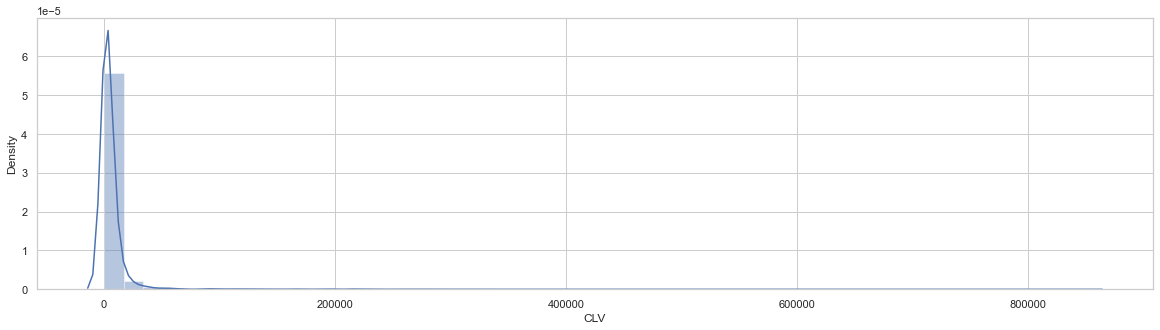

In [85]:
print(SALES['CLV'].describe())
plt.figure(figsize=(20,5))
sns.distplot(SALES['CLV'], kde=True)
plt.show()

I'll create a new data set that only contains the columns need to be interested in.

In [86]:
df3 = SALES[['ID_OF_CUSTOMER','Sep-2021','Aug-2021','Jul-2021','Jun-2021','May-2021','Apr-2021','CLV']]
df3.head()

MONTH_BY_YEAR,ID_OF_CUSTOMER,Sep-2021,Aug-2021,Jul-2021,Jun-2021,May-2021,Apr-2021,CLV
0,12346.0,0.000,0.000,0.000,0.000,0.000,0.000,254705.880
1,12747.0,0.000,0.000,2228.754,995.610,0.000,1241.790,13846.833
2,12748.0,22251.801,6900.795,18851.184,3869.151,6448.761,3541.263,108546.042
3,12749.0,2518.098,0.000,0.000,0.000,9092.259,0.000,13499.904
4,12820.0,0.000,1134.408,718.641,0.000,0.000,0.000,3109.722


Create a last dataset that I will use it to build the model.

In [87]:
dflast = df3.copy()

Check the correlation between the columns of the last dataset.

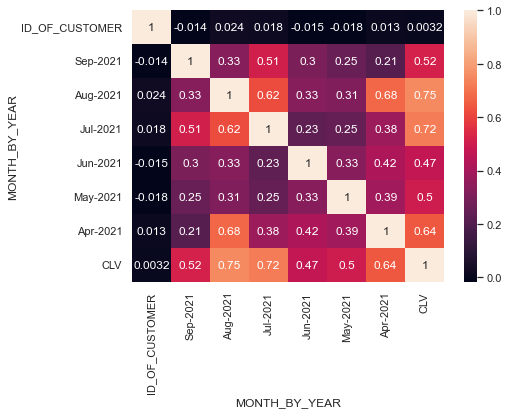

In [88]:
plt.figure(figsize=(7,5))
sns.heatmap(dflast.corr(),annot=True)
plt.show()

The "CLV" is the feature we will predict. So, how much does each independent variable correlate with this target variable?

MONTH_BY_YEAR
CLV               1.000000
Aug-2021          0.750516
Jul-2021          0.724179
Apr-2021          0.642231
Sep-2021          0.517859
May-2021          0.495913
Jun-2021          0.467872
ID_OF_CUSTOMER    0.003167
Name: CLV, dtype: float64


<AxesSubplot:ylabel='MONTH_BY_YEAR'>

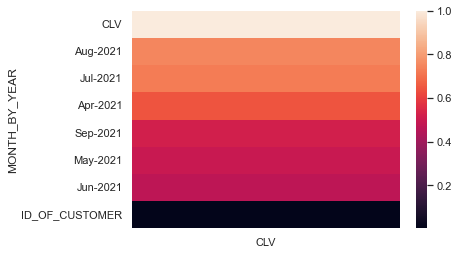

In [89]:
clv_corr = dflast.corr()["CLV"].sort_values(ascending=False)
print(clv_corr)
sns.heatmap(pd.DataFrame(clv_corr))

It is easy to see that all the features have a great influence on the CLV feature except the "ID_OF_CUSTOMER" feature. Therefore, I will not use it for the model.

BUILD MODEL

Define standalone features and Target features.

In [90]:
X = dflast[ ['Sep-2021', 'Aug-2021', 'Jul-2021', 'Jun-2021','May-2021','Apr-2021'] ]
y = dflast[ ['CLV']]

Run a regression on the entire dataset to see if there is any kind of model.

In [91]:
import statsmodels.api as st
X1 = st.add_constant(X)
reg_model=st.OLS(y,X1)
result=reg_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    CLV   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     2399.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:57:14   Log-Likelihood:                -42167.
No. Observations:                3920   AIC:                         8.435e+04
Df Residuals:                    3913   BIC:                         8.439e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        981.8549    189.455      5.183      0.0

X can explain 78.6 percent of the variability in Y, and the p-values for all variables are less than 0.05. This is excellent.

Split the data for training set and test set.

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

LINEAR REGRESSION MODEL

Fit the data into the linear regression model

In [93]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [94]:
X_train1 = st.add_constant(X_train)
reg_model = st.OLS(y_train,X_train1)
result = reg_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    CLV   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     1579.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:57:15   Log-Likelihood:                -29961.
No. Observations:                2744   AIC:                         5.994e+04
Df Residuals:                    2737   BIC:                         5.998e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1159.6547    265.436      4.369      0.0

EVALUATION

Check the linear regression model’s precision

In [95]:
print(f'Precision of training set: {regressor.score(X_train, y_train)}')
print(f'Precision of on test set: {regressor.score(X_test, y_test)}')

Precision of training set: 0.7758919124964715
Precision of on test set: 0.9066089274834814


We can see that the precision on the training set is 77.59%. It is good and we can satisfied about it.

The precision on the test set is 90.07%, so it is great.

Next to, I will use the R squared metric, assess the precision of our linear regression model.

In [96]:
from sklearn.metrics import mean_squared_error
y_pred_regressor = regressor.predict(X_test)
regressor_r = regressor.score(X_test, y_test)
print(f'Linear Regression R squared: {regressor_r}')

Linear Regression R squared: 0.9066089274834814


This means my model can explain 90.07% of the variability in the ‘CLV’ feature using our 6 independent features.

Next, the RMSE metric is used to assess the accuracy of our linear regression model.

In [97]:
regressor_mse = mean_squared_error(y_pred_regressor, y_test)
regressor_rmse = np.sqrt(regressor_mse)
print(f'Linear Regression RMSE: {regressor_rmse}')

Linear Regression RMSE: 3792.9973836278928


The RMSE estimates the deviation of the actual y-values from the regression line. This means the model predicted the CLV value of each customer in the test set to within $3792.99 of the true CLV value.

PRACTICAL

I want to test my model actually work in reallife, so I will import a data of a new customer into my model to predict a new value. 

In [98]:
# import a new data
new_data = np.array([1000, 2000, 4000, 7000, 9000, 10000]).reshape(1, -1)
new_pred=regressor.predict(new_data)
new_pred1 = int(new_pred[0][0])
print(f"The mean customer CLV is: ${new_pred1}")

The mean customer CLV is: $57261


c:\Users\Phuc Thanh Tran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Let's calculate the Z value for a 99% confidence interval, which is 0.5 percent probability.

In [99]:
StandardError = regressor_rmse
ExpectedValue = new_pred1
import scipy.stats as si
alpha = 1 - 0.99
zvalue = abs(si.norm.ppf(0.5*alpha))
print(f'Z value: {zvalue}')

Z value: 2.5758293035489004


In [100]:
Upper = int(ExpectedValue + zvalue * StandardError)
Lower = int(ExpectedValue - zvalue*StandardError)
print(f"The Customer's CLV is between ${Lower} and ${Upper} with a confidence level of 99%.")

The Customer's CLV is between $47490 and $67031 with a confidence level of 99%.
